[-1 -1]
[1 1]
[[0.5  0.25]
 [0.25 1.  ]]
[[ 0.5  -0.25]
 [-0.25  1.  ]]
[[3 2]
 [2 3]]


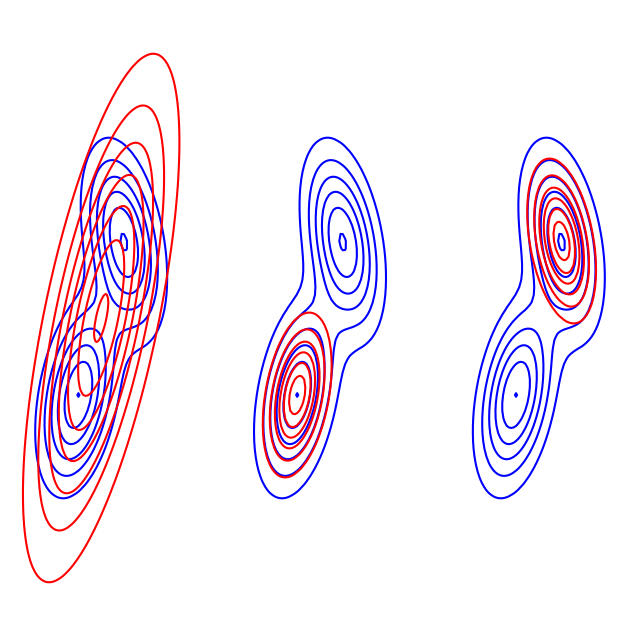

In [5]:
# Visualize difference between KL(p,q) and KL(q,p) where p is a mix of two
# 2d Gaussians, and q is a single 2d Gaussian
# Author: animesh-007


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

mu = np.array([[-1, -1], [1, 1]])

Sigma = np.zeros((2, 2, 2))
Sigma[:, :, 0] = [[1 / 2, 1 / 4], [1 / 4, 1]]
Sigma[:, :, 1] = [[1 / 2, -1 / 4], [-1 / 4, 1]]
SigmaKL = np.array([[3, 2], [2, 3]])


x1 = np.arange(-4, 4.1, 0.1).T
x2 = x1

n1 = np.size(x1)
n2 = np.size(x2)

f1 = np.zeros((n1, n2))
f2 = np.zeros((n1, n2))
klf = np.zeros((n1, n2))
kll = np.zeros((n1, n2))
klr = np.zeros((n1, n2))
print(mu[0, :])
print(mu[1, :])
print(Sigma[:, :, 0])
print(Sigma[:, :, 1])
print(SigmaKL)
for i in range(n1):
    x_tile = np.tile(x1[i], (n2, 1))
    x_tile = x_tile.reshape(-1)
    x_final = np.array([x_tile, x2])
    x_final = x_final.T
    f1[i, :] = multivariate_normal.pdf(x_final,[-1, -1],[[1 / 2, 1 / 4], [1 / 4, 1]])
    f2[i, :] = multivariate_normal.pdf(x_final, [1 ,1], [[1 / 2, -1 / 4], [-1 / 4, 1]])
    klf[i, :] = multivariate_normal.pdf(x_final, [0, 0], [[3, 2], [2, 3]])
    kll[i, :] = multivariate_normal.pdf(x_final, [-1, -1], [[1 / 2, 1 / 4], [1 / 4, 1]] * 0.6)
    klr[i, :] = multivariate_normal.pdf(x_final, [1, 1], [[1 / 2, -1 / 4], [-1 / 4, 1]] * 0.6)


f = f1 + f2

plots = [klf, kll, klr]

fig, ax = plt.subplots(1, 3, figsize=(8, 8))
for axi, plot_ in zip(ax.flat, plots):
    axi.axis("off")
    axi.contour(x1, x2, f, colors="b", zorder=1)
    axi.contour(x1, x2, plot_, colors="r", zorder=10)

plt.show()